In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/downloads/NYuniversities2.csv', delimiter = ',', header = 0)
df.drop(['Rank', 'Rank Pct Rank'], axis=1, inplace = True)

In [3]:
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [5]:
df['Prof G Categorization'].unique().tolist()

['Perish', 'Survive', 'Struggle', 'Thrive']

In [6]:
df['Student Life Grade'].unique().tolist()

['B+', 'C', 'A+', 'B-', 'A', 'C+', 'B', 'A-', 'C-', 'D']

In [7]:
df

,Institution Name,Full Time Enrollment,State,Undergraduate Admit Rate,Average Monthly Search Volume,Credential Score,Student Life Grade,Student Life Score,Experience Score,Instructional Wages per Full-Time Student,Eduation Score,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,Vulnerability Score,Prof G Categorization
0,Adelphi University,6562,NY,0.74,60500,1.27,B+,4.00,2.4,8995,1.92,38740,28738,0.03,1.09,Perish
1,Bard College,2121,NY,0.65,49500,1.85,C,2.66,1.6,21360,1.04,54680,69834,0.17,1.39,Perish
2,Barnard College,2519,NY,0.14,60500,2.53,A+,5.00,3.0,12969,2.34,55032,136998,0.12,1.09,Survive
3,Binghamton University,15748,NY,0.40,90500,2.26,B+,4.00,2.4,6712,1.90,18251,7027,0.06,1.60,Survive
4,Clarkson University,3651,NY,0.71,33100,1.34,B-,3.33,2.0,9604,2.42,49444,54321,0.02,0.78,Struggle
5,Colgate University,2944,NY,0.25,60500,2.49,A,4.66,2.8,13294,2.54,55870,313724,0.08,0.83,Thrive
6,Columbia University in the City of New York,26072,NY,0.06,301000,2.97,A+,5.00,3.0,57219,2.95,59430,416893,0.14,0.96,Survive
7,Cornell University,23499,NY,0.11,201000,2.85,A+,5.00,3.0,16225,2.79,55188,292416,0.10,0.91,Thrive
8,CUNY City College,10988,NY,0.48,2400,0.88,C+,3.00,1.8,10179,1.97,10975,28135,0.02,0.97,Survive
9,Daemen College,2062,NY,0.54,14800,0.92,C+,3.00,1.8,6907,0.83,28580,7817,0.01,1.01,Perish


In [8]:
df.sort_values('Vulnerability Score')

,Institution Name,Full Time Enrollment,State,Undergraduate Admit Rate,Average Monthly Search Volume,Credential Score,Student Life Grade,Student Life Score,Experience Score,Instructional Wages per Full-Time Student,Eduation Score,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,Vulnerability Score,Prof G Categorization
26,St. Thomas Aquinas College,1229,NY,0.76,8100,1.18,C,2.66,1.6,5335,0.19,31950,41182,0.00,0.61,Struggle
37,Wells College,463,NY,0.79,8100,0.75,D,2.00,1.2,6956,0.25,40700,80313,0.02,0.64,Struggle
21,Saint John Fisher College,3161,NY,0.64,390,0.79,A-,4.33,2.6,8290,1.10,34310,29668,0.00,0.69,Struggle
34,Union College,2195,NY,0.39,40500,2.15,A-,4.33,2.6,33452,2.63,55290,601449,0.06,0.69,Thrive
12,Hartwick College,1156,NY,0.83,14800,0.61,C+,3.00,1.8,8249,0.84,45510,66872,0.02,0.72,Struggle
15,Houghton College,937,NY,0.95,12100,0.61,C+,3.00,1.8,5361,0.17,32488,60000,0.02,0.77,Struggle
11,Hamilton College,1991,NY,0.21,40500,2.38,A,4.66,2.8,14195,2.45,54620,508710,0.08,0.77,Thrive
4,Clarkson University,3651,NY,0.71,33100,1.34,B-,3.33,2.0,9604,2.42,49444,54321,0.02,0.78,Struggle
5,Colgate University,2944,NY,0.25,60500,2.49,A,4.66,2.8,13294,2.54,55870,313724,0.08,0.83,Thrive
13,Hobart William Smith Colleges,2220,NY,0.57,590,1.32,B-,3.33,2.0,9056,1.36,55255,104531,0.04,0.84,Struggle


In [9]:
df.describe()

,Full Time Enrollment,Undergraduate Admit Rate,Average Monthly Search Volume,Credential Score,Student Life Score,Experience Score,Instructional Wages per Full-Time Student,Eduation Score,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,Vulnerability Score
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,8533.743590,0.524103,55440.512821,1.661282,3.851795,2.312821,12183.487179,1.627692,42631.282051,117894.846154,0.087179,1.090000
std,8948.027821,0.226979,61504.893299,0.711400,0.844203,0.506370,9188.325564,0.771981,14347.405680,147991.747435,0.077662,0.300893
min,463.000000,0.060000,390.000000,0.180000,2.000000,1.200000,5335.000000,0.170000,10975.000000,4762.000000,0.000000,0.610000
25%,2158.000000,0.395000,14800.000000,1.210000,3.165000,1.900000,7784.000000,1.045000,33399.000000,28436.500000,0.020000,0.860000
50%,5379.000000,0.560000,40500.000000,1.560000,4.000000,2.400000,9604.000000,1.650000,45700.000000,65527.000000,0.080000,1.060000
75%,12362.000000,0.685000,75500.000000,2.285000,4.495000,2.700000,12462.500000,2.305000,54650.000000,114676.500000,0.130000,1.285000
max,43140.000000,0.950000,301000.000000,2.970000,5.000000,3.000000,57219.000000,2.950000,59430.000000,601449.000000,0.370000,1.790000


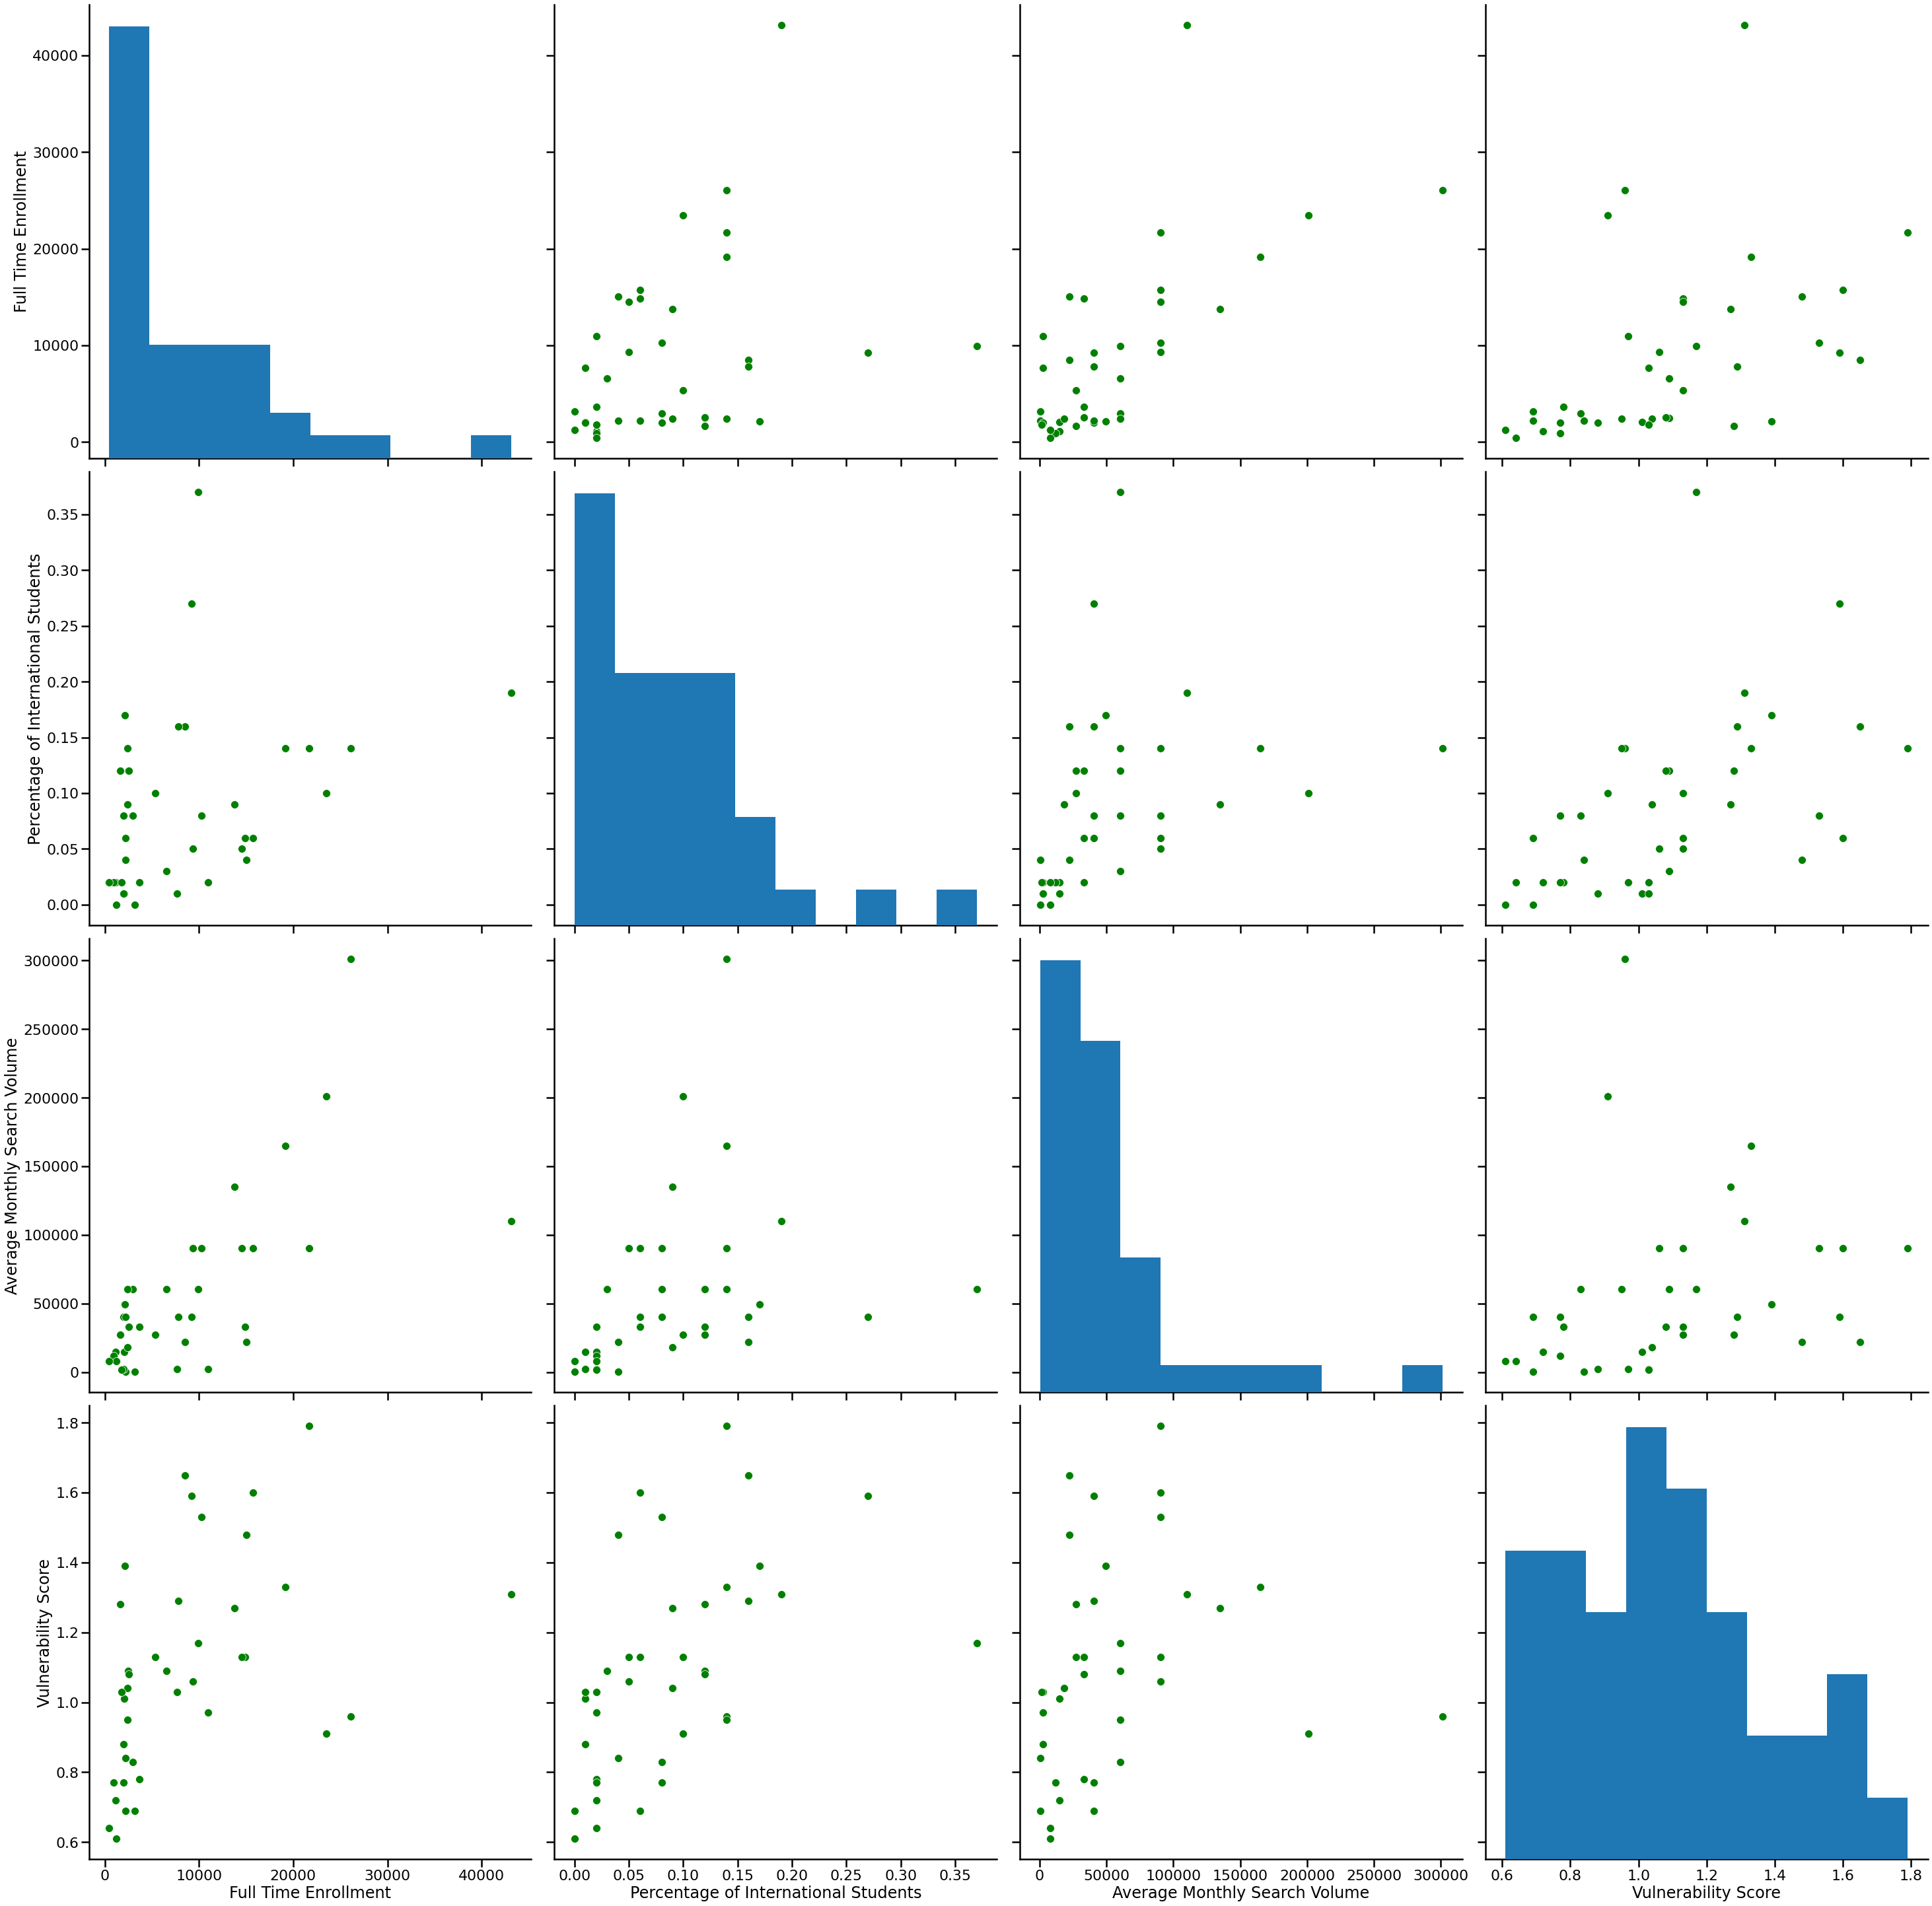

In [10]:
# sns.pairplot(df)

# #Categorizations (more information here): Schools have been categorized into four buckets: 

# 1) Thrive: High Value, Low Vulnerability, 
# 3) Struggle: Low Value, Low Vulnerability
## ---> GOOD

# 2) Survive: High Value, High Vulnerability,
# 4) Perish: Low Value, High Vulnerability
## ---> BAD

sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
sns.pairplot(df[['Full Time Enrollment','Percentage of International Students','Average Monthly Search Volume', 'Vulnerability Score']], plot_kws = {"color": "green"}, height = 10)


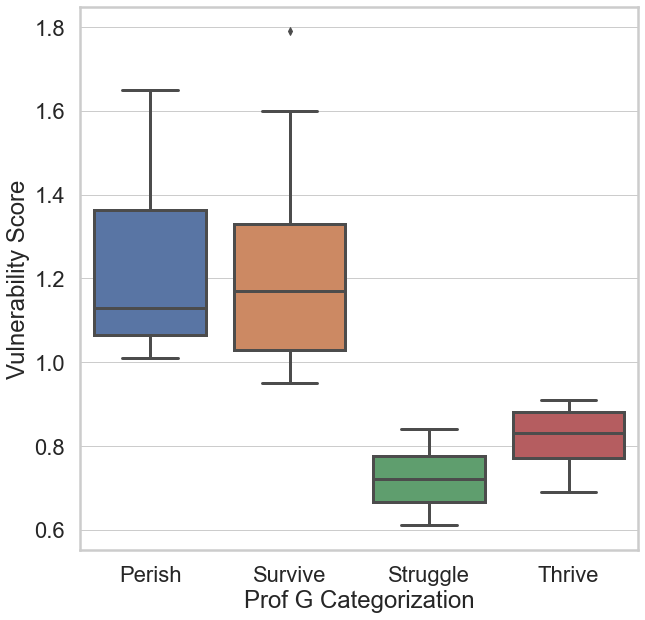

In [11]:
# #Categorizations (more information here): Schools have been categorized into four buckets: 

# 1) Thrive: High Value, Low Vulnerability, 
# 3) Struggle: Low Value, Low Vulnerability
## ---> GOOD

# 2) Survive: High Value, High Vulnerability,
# 4) Perish: Low Value, High Vulnerability
## ---> BAD

sns.set(rc={'figure.figsize': (10,10)})
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'Prof G Categorization', y = 'Vulnerability Score', data = df)

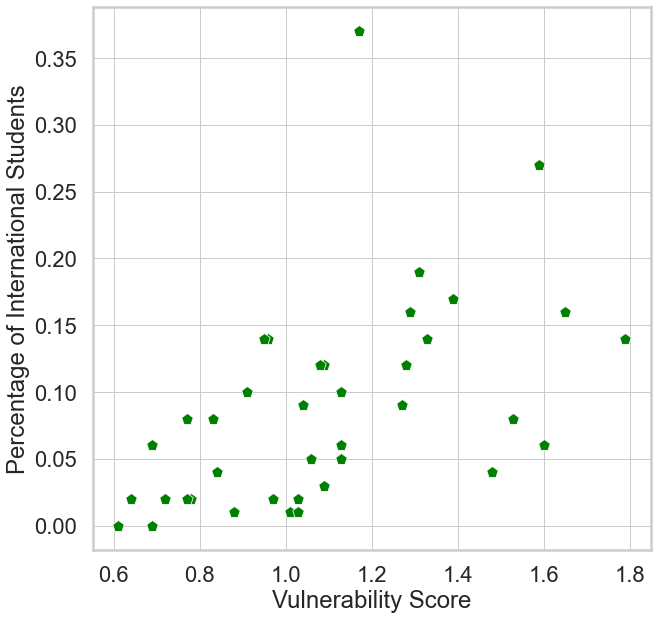

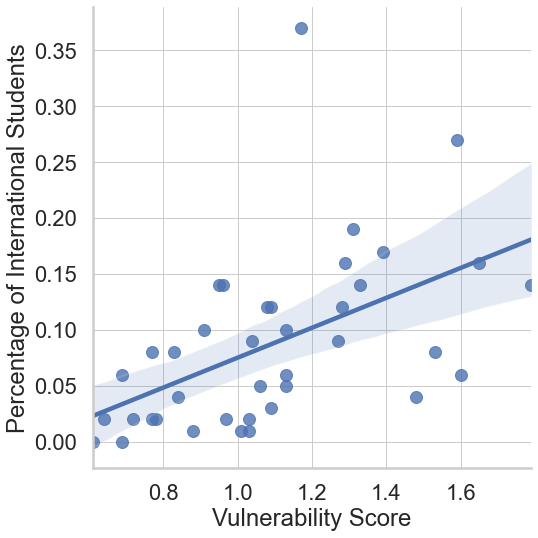

In [12]:
sns.set_style("whitegrid")
ax = sns.scatterplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, color = 'green', marker = 'p')
ax = sns.lmplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, height = 8, aspect = 1)

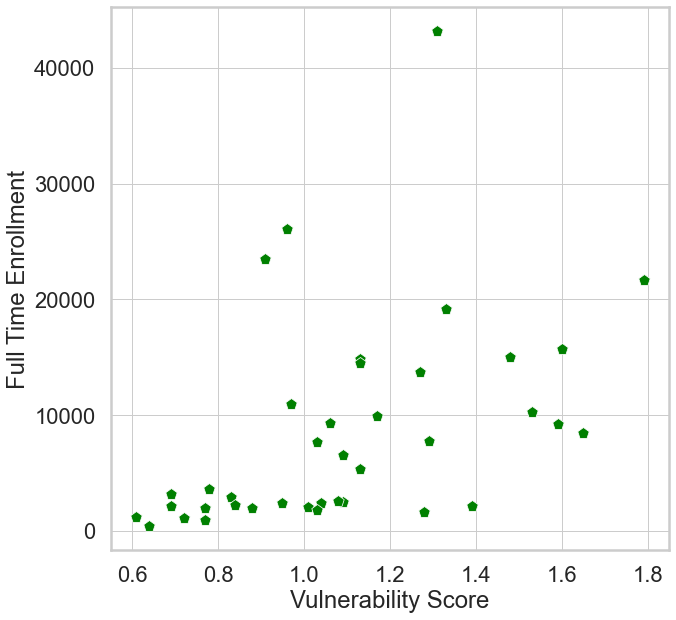

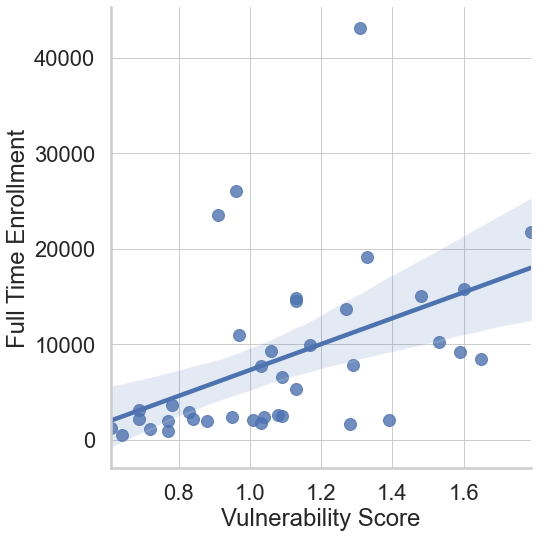

In [13]:
sns.set_style("whitegrid")
ax = sns.scatterplot(x = "Vulnerability Score", y = "Full Time Enrollment", data = df, color = 'green', marker = 'p')
ax = sns.lmplot(x = "Vulnerability Score", y = "Full Time Enrollment", data = df, height = 8, aspect = 1)

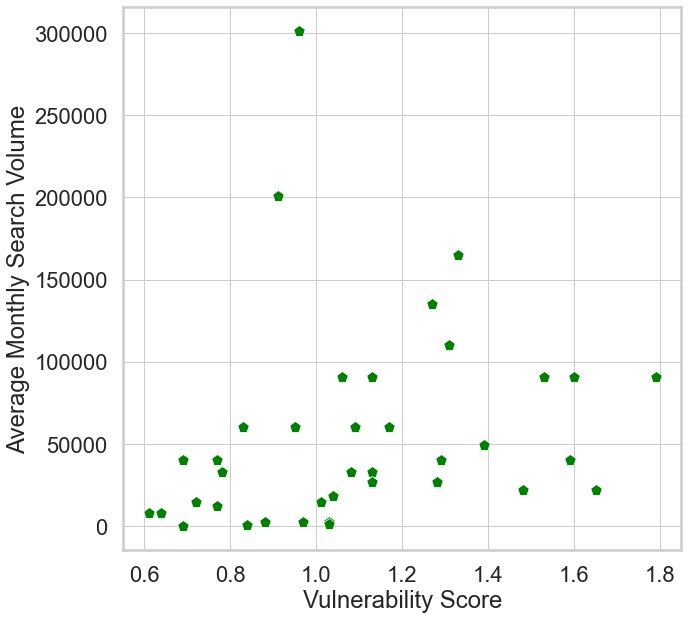

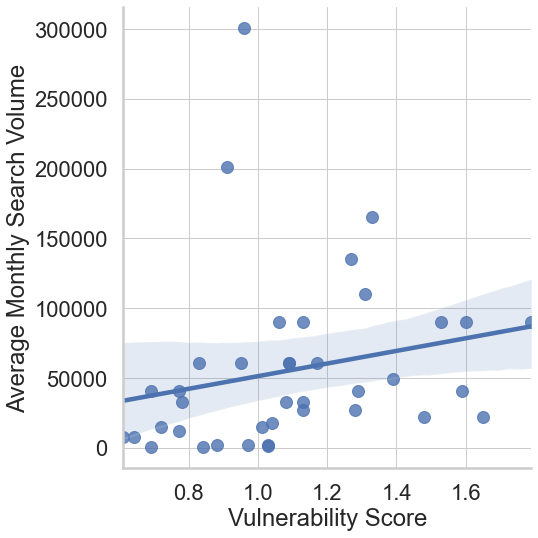

In [14]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Average Monthly Search Volume", data = df, color = 'green', marker = 'p')
ax = sns.lmplot(x = "Vulnerability Score", y = "Average Monthly Search Volume", data = df, height = 8, aspect = 1)

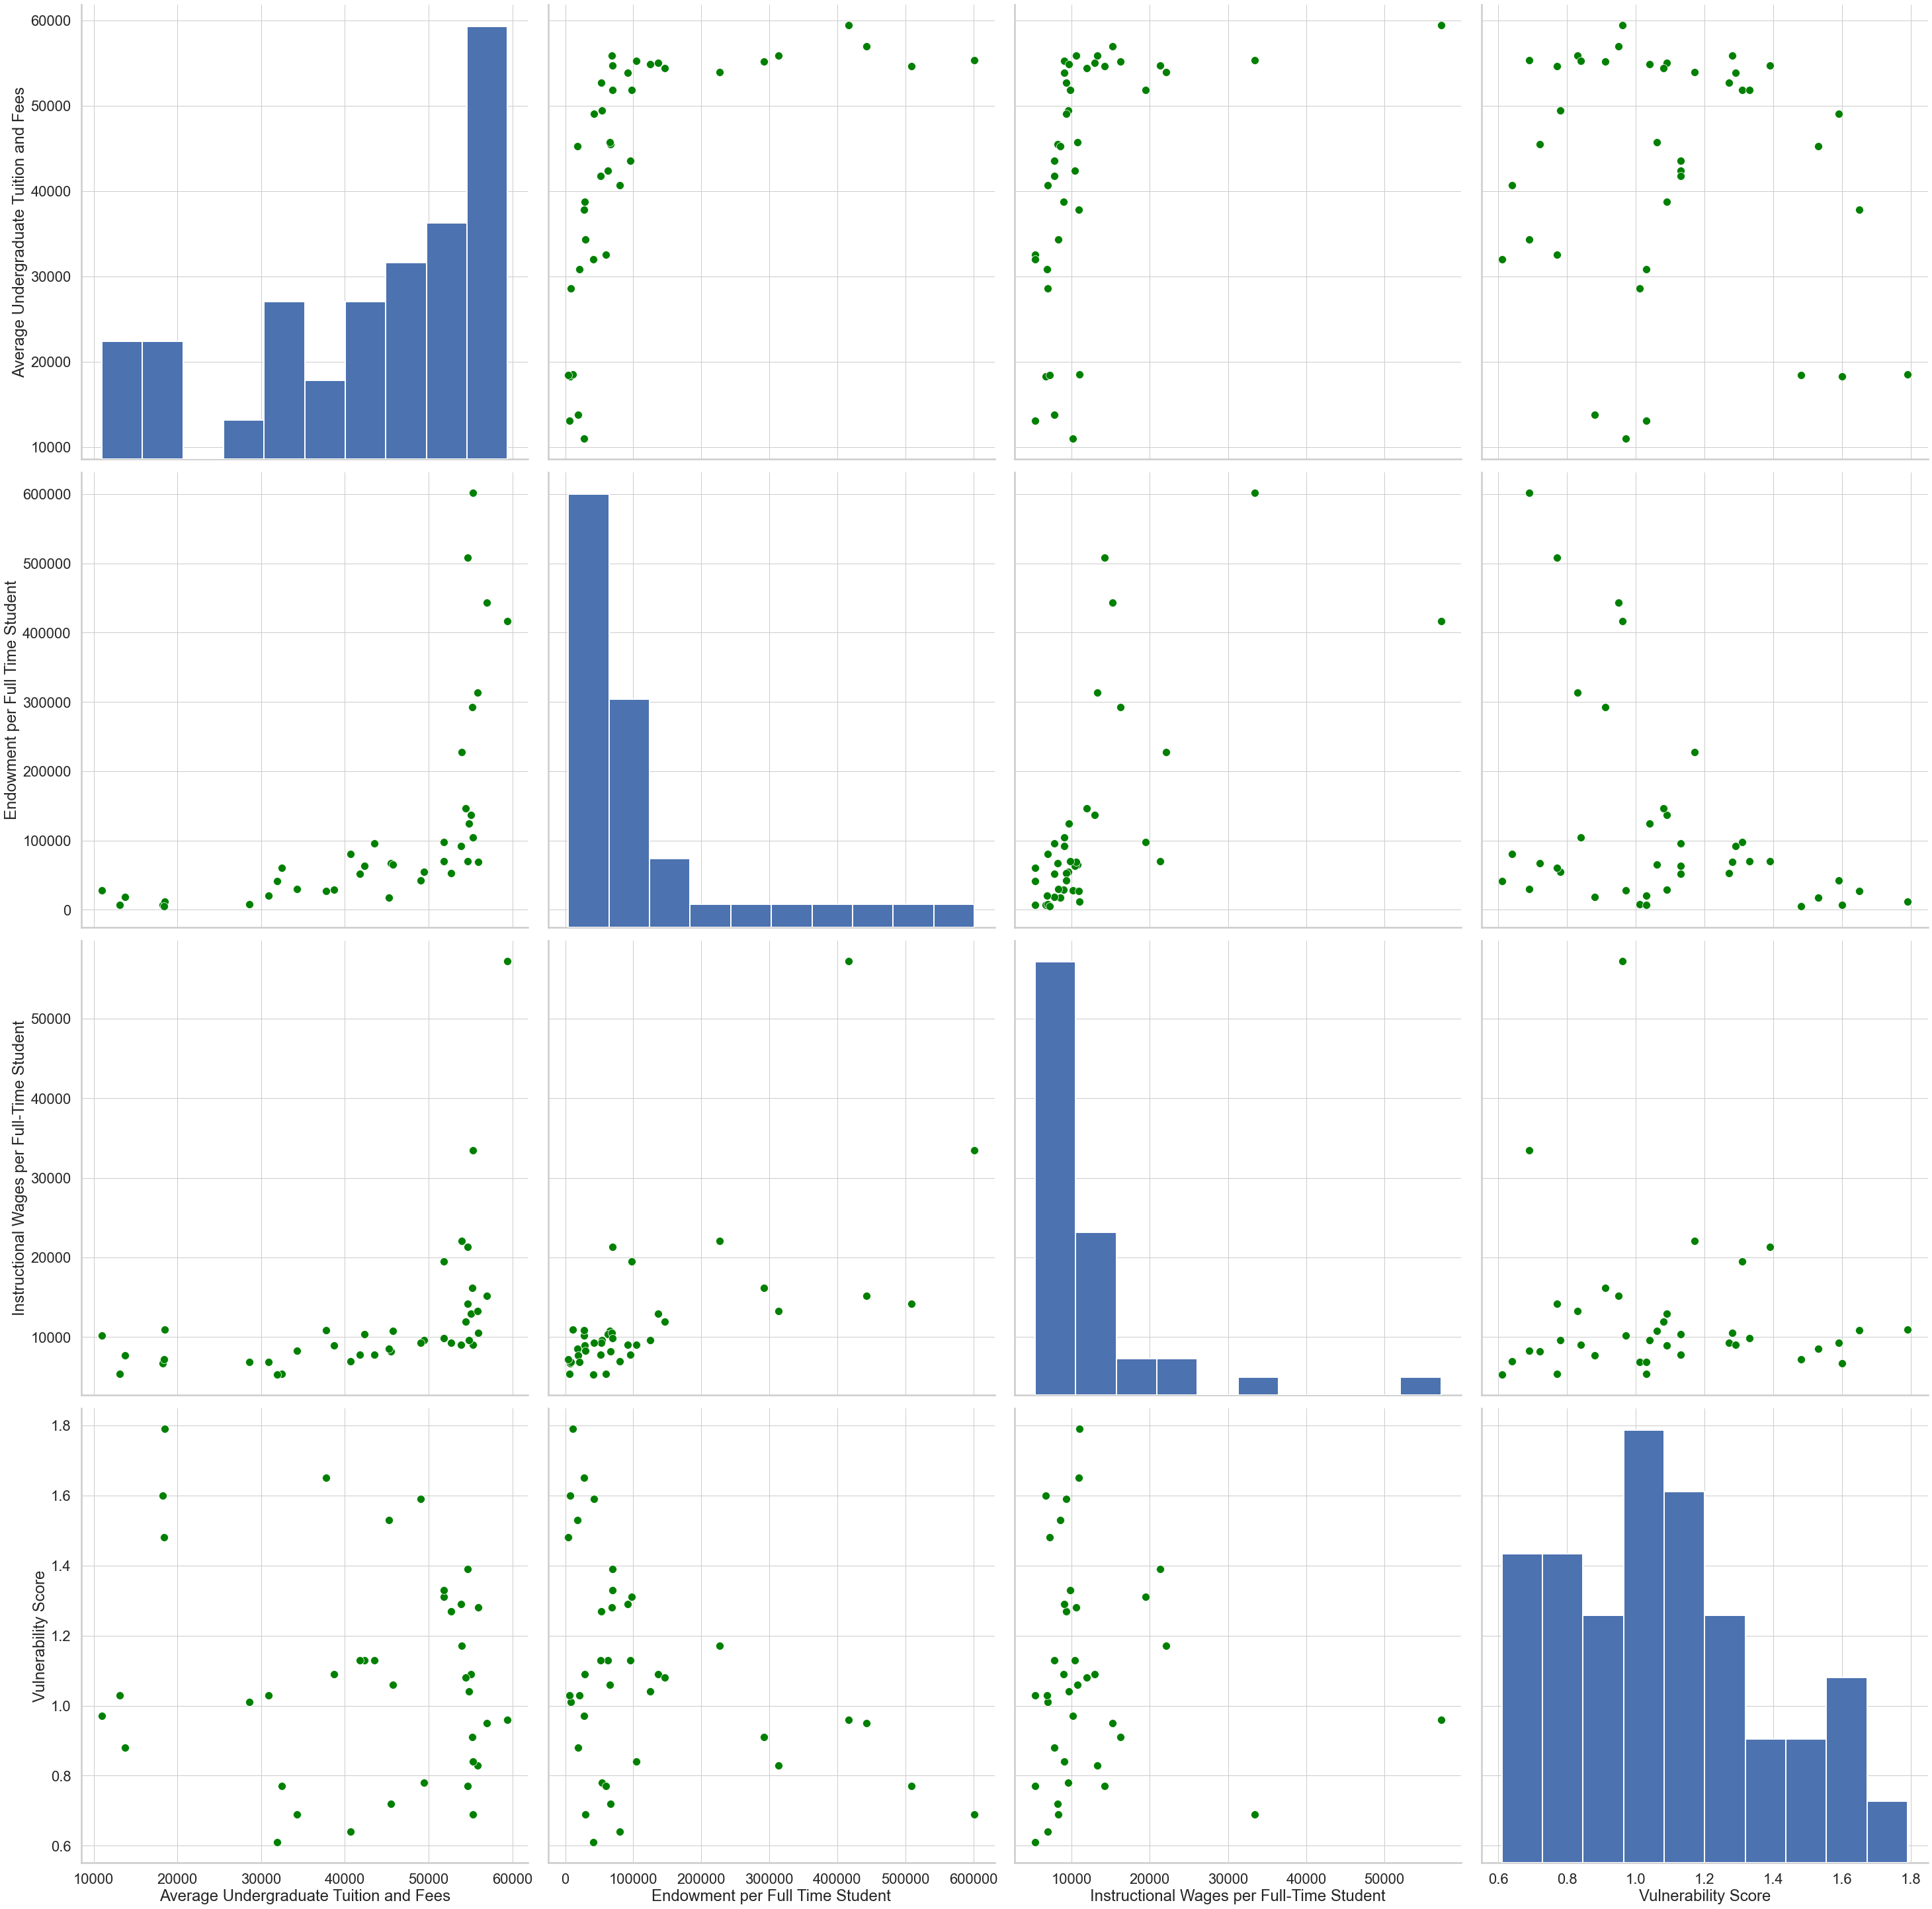

In [15]:
# sns.pairplot(df)
sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
sns.pairplot(df[['Average Undergraduate Tuition and Fees','Endowment per Full Time Student','Instructional Wages per Full-Time Student', 'Vulnerability Score']], plot_kws = {"color": "green"}, height = 10)



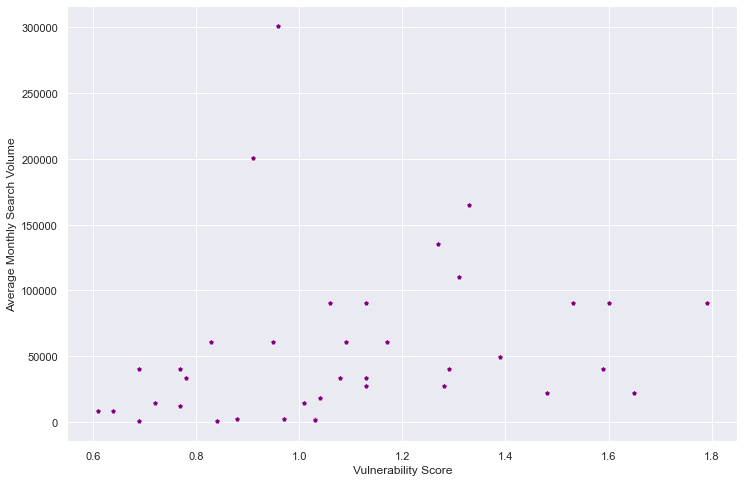

In [16]:
sns.set(rc={'figure.figsize': (12, 8)})
ax = sns.scatterplot(x = "Vulnerability Score", y = "Average Monthly Search Volume", data = df, color = 'purple', marker = 'p')
# ax = sns.lmplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, height = 8, aspect = 1)

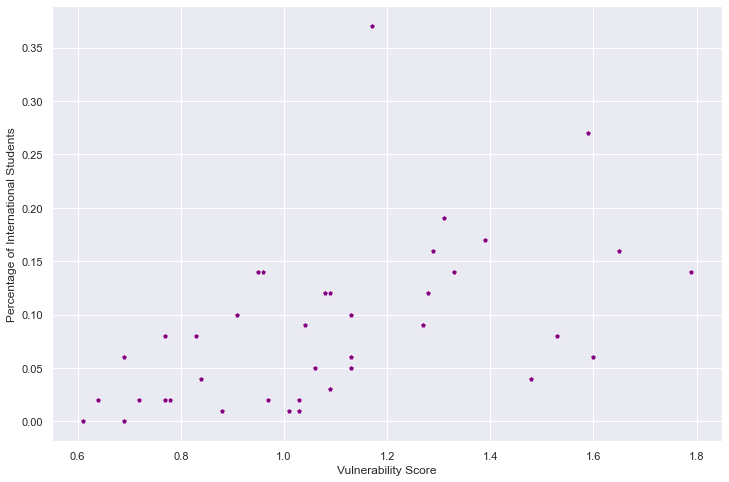

In [17]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, color = 'purple', marker = 'p')
#ax = sns.lmplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, height = 8, aspect = 1)

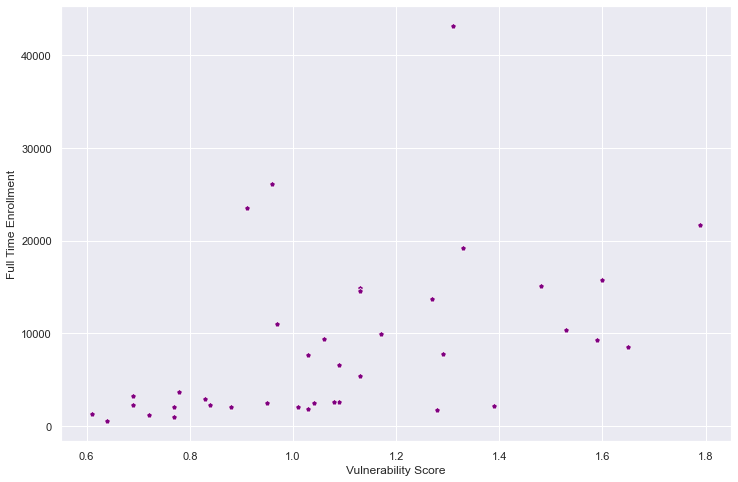

In [18]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Full Time Enrollment", data = df, color = 'purple', marker = 'p')
#ax = sns.lmplot(x = "Vulnerability Score", y = "Full Time Enrollment", data = df, height = 8, aspect = 1)

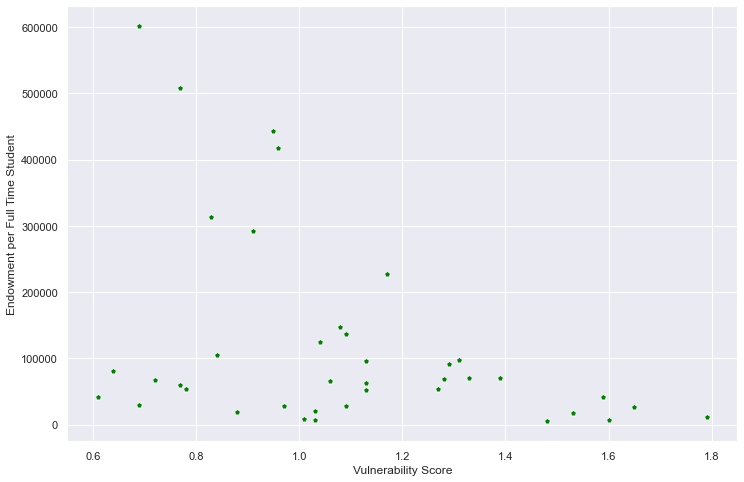

In [19]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Endowment per Full Time Student", data = df, color = 'green', marker = 'p')
#ax = sns.lmplot(x = "Vulnerability Score", y = "Endowment per Full Time Student", data = df, height = 8, aspect = 1)

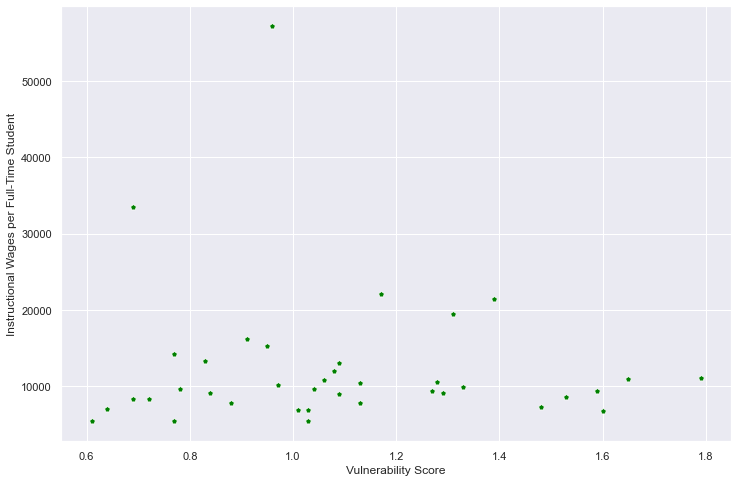

In [20]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Instructional Wages per Full-Time Student", data = df, color = 'green', marker = 'p')
#ax = sns.lmplot(x = "Vulnerability Score", y = "Instructional Wages per Full-Time Student", data = df, height = 8, aspect = 1)

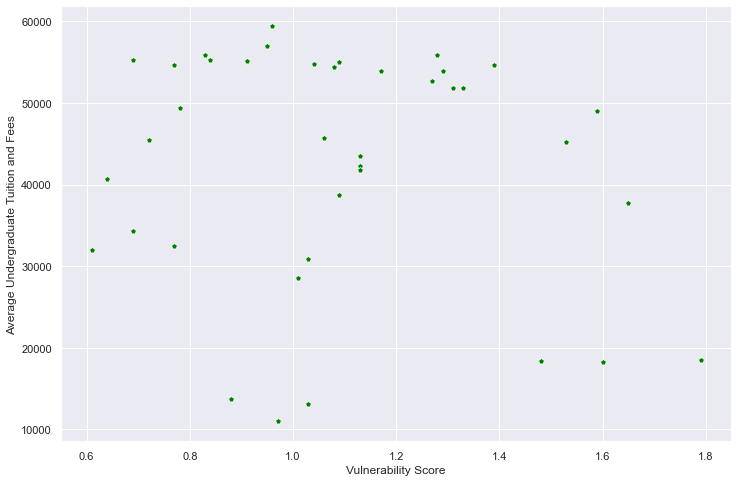

In [21]:
ax = sns.scatterplot(x = "Vulnerability Score", y = "Average Undergraduate Tuition and Fees", data = df, color = 'green', marker = 'p')
#ax = sns.lmplot(x = "Vulnerability Score", y = "Average Undergraduate Tuition and Fees", data = df, height = 8, aspect = 1)

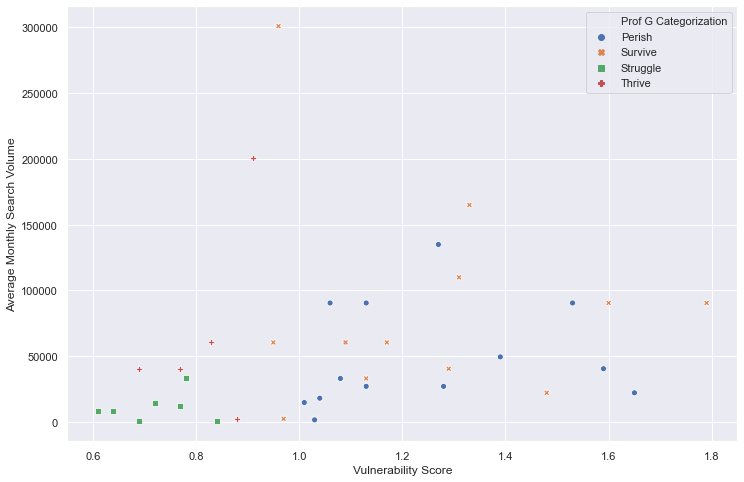

In [22]:
ax =sns.scatterplot(x = 'Vulnerability Score' , y = 'Average Monthly Search Volume', data = df, hue = 'Prof G Categorization', style = 'Prof G Categorization' )

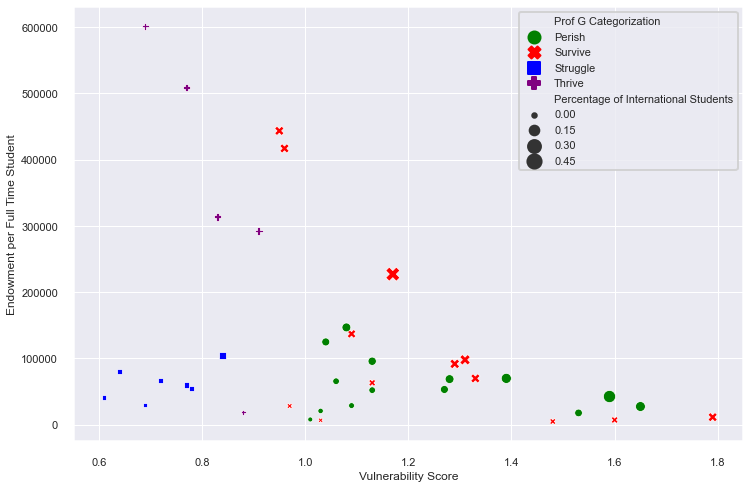

In [23]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 1.0})
ax =sns.scatterplot(x = 'Vulnerability Score', y = 'Endowment per Full Time Student', data = df, hue = 'Prof G Categorization', style = 'Prof G Categorization', 
                    size = 'Percentage of International Students', sizes = (20, 200),  palette = ["green", "red", "blue", "purple"] )

In [24]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 1.0})
ax =sns.scatterplot(x = 'Vulnerability Score', y = 'Full', data = df, hue = 'Prof G Categorization', style = 'Prof G Categorization', 
                    size = 'Percentage of International Students', sizes = (20, 200),  palette = ["green", "red", "blue", "purple"] )

ValueError: Could not interpret input 'Full'